# Data Preprocessing for Attribution Relations Extraction

This notebook is developed by Fina Polat for NLP Tutorial, June 2021.

## How to run this notebook

First set variable 'what_type_files' on the type of files you want to preprocess: 'test', 'dev' or 'train'.
Then run the entire notebook.
Please do this for all three types.

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
%matplotlib inline

## Load and prepare data

Thanks to Roser Morante for providing the preprocessed PolNeAR and PARC 3.0 corpora inCONLL format for this task.

PARC Corpus

Silvia Pareti. Parc3.0: A corpus of attribution relations. International Conference on Language Resources and Evaluation 2016 (LREC 2016). https://www.aclweb.org/anthology/L16-1619/ (Links to an external site.)

Attention: It not allowed to redistribute the PARC corpus or to use it for other purposes than building an attribution system for this course. The reason is that the text is subject to having an LDC license.

PolNeAR Corpus

An attribution relations corpus for political news, Edward Newell, Drew Margolin, Derek Ruths, International Conference on Language Resources and Evaluation 2018 (LREC 2018). https://www.aclweb.org/anthology/L18-1524/ (Links to an external site.)

https://github.com/networkdynamics/PolNeAR

## 1. Prepare PolNeAR data:

In [96]:
what_type_files = 'dev'  # 'test', 'dev' or 'train'

In [97]:
polnear_path = f'../polnear-conll/{what_type_files}-conll-foreval/'

In [ ]:
#Read files in the training data folder
polnear_folder = os.listdir(polnear_path)
print(len(polnear_folder))

# create an empty list to dump the data
polnear_data = []
#iterate over the data files
for file in polnear_folder:
    # data is not located in the same folder, thus define the file path.
    filepath = f'{polnear_path}{file}'
    # open the files
    with open(filepath, "r", encoding="latin1") as data_handle:
        # read the lines
        text = data_handle.readlines()
        #print(len(text))
        for line in text:
            polnear_data.append(line)
        polnear_data.append("Art_end")
    
print("Reading the dataset.....")

print(text[0])
print(type(text))
print(len(text))

print(polnear_data[0])
print(type(polnear_data))
print(len(polnear_data))

In [99]:
text = []
for item in polnear_data:
    item = item.strip('\n')
    text.append(item.split("\t"))
    
    
print(text[2])

['breitbart_2016-09-15_pat-caddell-democrat-voters-worr.txt.xml', '1', '3', '3', '11,12', ':', ':', ':', 'punct', '2', 'B-CUE-1 _ _ _ _ _ _']


In [100]:
#create the data frame
df_polnear = pd.DataFrame(text, columns=["Article_Name", "Sentence_nr", "Nr_in_file", "Nr_in_sentence", "FromTo", "Word", "Lemma", "POS", "Dep_label", "Token_dep_head", "AR_label"])
# df_polnear = pd.DataFrame(text, columns=["Article_Name", "Number1", "Number2", "Number3", "Number4", "Word", "Lemma", "POS", "Dep_rel", "Number5", "AR_label"])
#drop the lines which won't be used.
# df_polnear.drop(["Article_Name", "Number1", "Number2", "Number3", "Number4", "Lemma", "POS", "Dep_rel", "Number5"], axis=1, inplace=True)
#delete the lists in order to prevent confusions in the notebook.
del text, polnear_data

In [101]:
print(len(df_polnear.index))

81656


In [102]:
df_polnear.head(30)

,Article_Name,Sentence_nr,Nr_in_file,Nr_in_sentence,FromTo,Word,Lemma,POS,Dep_label,Token_dep_head,AR_label
0,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,1,1,"0,3",Pat,Pat,NNP,compound,2,B-SOURCE-1 _ _ _ _ _ _
1,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,2,2,"4,11",Caddell,Caddell,NNP,root,0,I-SOURCE-1 _ _ _ _ _ _
2,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,3,3,"11,12",:,:,:,punct,2,B-CUE-1 _ _ _ _ _ _
3,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,4,4,"13,21",Democrat,Democrat,NNP,compound,5,B-CONTENT-1 _ _ _ _ _ _
4,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,5,5,"22,28",Voters,Voters,NNPS,dep,2,I-CONTENT-1 _ _ _ _ _ _
5,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,6,6,"29,36",Worried,worried,JJ,amod,5,I-CONTENT-1 _ _ _ _ _ _
6,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,7,7,"37,42",About,about,IN,case,12,I-CONTENT-1 _ _ _ _ _ _
7,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,8,8,"43,50",Hillary,Hillary,NNP,compound,9,I-CONTENT-1 _ _ _ _ _ _
8,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,9,9,"51,58",Clinton,Clinton,NNP,nmod:poss,12,I-CONTENT-1 _ _ _ _ _ _
9,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,10,10,"58,60",'s,'s,POS,case,9,I-CONTENT-1 _ _ _ _ _ _


In [103]:
def clean_labels(label):
    '''take the label and remove the unwanted characters, return the cleaned version'''
    
    chars_2_remove = ['_','\n','0','1','2','3','4','5','6','7','8','9','', '.', '-']
    clean_char = []
    for char in str(label):
        if char not in chars_2_remove:
            clean_char.append(char)
            
    clean_label = "".join(clean_char)
    final_label = clean_label.strip()

    return str(final_label)
     

In [104]:
def mark_sent_end(word):
    '''take label as string input, remove digits and punctuation, return clean string'''
    word = str(word)
    
    if word == "None":
        
        new_word = "Sent_end"
    else:
        new_word = word

    
    return str(new_word)    

In [105]:
#test the function:

test_string = "I-CONTENT-1 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...\n"

clean_labels(test_string)

'ICONTENT'

In [106]:
#apply it on the df:
df_polnear['AR_label'] = df_polnear['AR_label'].apply(clean_labels)
df_polnear['Word'] = df_polnear['Word'].apply(mark_sent_end)

In [107]:
#check the df:
df_polnear.head(50)

,Article_Name,Sentence_nr,Nr_in_file,Nr_in_sentence,FromTo,Word,Lemma,POS,Dep_label,Token_dep_head,AR_label
0,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,1,1,"0,3",Pat,Pat,NNP,compound,2,BSOURCE
1,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,2,2,"4,11",Caddell,Caddell,NNP,root,0,ISOURCE
2,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,3,3,"11,12",:,:,:,punct,2,BCUE
3,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,4,4,"13,21",Democrat,Democrat,NNP,compound,5,BCONTENT
4,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,5,5,"22,28",Voters,Voters,NNPS,dep,2,ICONTENT
5,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,6,6,"29,36",Worried,worried,JJ,amod,5,ICONTENT
6,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,7,7,"37,42",About,about,IN,case,12,ICONTENT
7,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,8,8,"43,50",Hillary,Hillary,NNP,compound,9,ICONTENT
8,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,9,9,"51,58",Clinton,Clinton,NNP,nmod:poss,12,ICONTENT
9,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,10,10,"58,60",'s,'s,POS,case,9,ICONTENT


In [108]:
AR_labels_Polnear = set(df_polnear['AR_label'].values.tolist())

print(len(AR_labels_Polnear))

print(AR_labels_Polnear)

8
{'ISOURCE', '', 'BSOURCE', 'ICUE', 'BCUE', 'BCONTENT', 'ICONTENT', 'None'}


In [109]:
#map the classes with or without BIO tags.
classes_map = {
    "None": "O",
    "": "O",
    "O": "O",
    "BCUE": "B-CUE", #"B-CUE",
    "ICUE": "I-CUE", #"I-CUE",
    "BCONTENT": "B-CONTENT", #"B-CONTENT",
    "ICONTENT": "I-CONTENT", #"I-CONTENT",
    "BSOURCE": "B-SOURCE", #"B-SOURCE",
    "ISOURCE": "I-SOURCE", #"I-SOURCE",
    'breitbartclintonwinsdemocraticpresidentxtxml': "O",
    'breitbartdonaldtrumpdeniesmiketysonitxtxml': "O",
}

df_polnear['AR_label'] = df_polnear['AR_label'].map(classes_map)


In [110]:
AR_labels_Polnear = set(df_polnear['AR_label'].values.tolist())

print(len(AR_labels_Polnear))

print(AR_labels_Polnear)


7
{'I-CONTENT', 'B-CUE', 'I-CUE', 'O', 'I-SOURCE', 'B-CONTENT', 'B-SOURCE'}


In [111]:
df_polnear.head(30)

,Article_Name,Sentence_nr,Nr_in_file,Nr_in_sentence,FromTo,Word,Lemma,POS,Dep_label,Token_dep_head,AR_label
0,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,1,1,"0,3",Pat,Pat,NNP,compound,2,B-SOURCE
1,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,2,2,"4,11",Caddell,Caddell,NNP,root,0,I-SOURCE
2,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,3,3,"11,12",:,:,:,punct,2,B-CUE
3,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,4,4,"13,21",Democrat,Democrat,NNP,compound,5,B-CONTENT
4,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,5,5,"22,28",Voters,Voters,NNPS,dep,2,I-CONTENT
5,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,6,6,"29,36",Worried,worried,JJ,amod,5,I-CONTENT
6,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,7,7,"37,42",About,about,IN,case,12,I-CONTENT
7,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,8,8,"43,50",Hillary,Hillary,NNP,compound,9,I-CONTENT
8,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,9,9,"51,58",Clinton,Clinton,NNP,nmod:poss,12,I-CONTENT
9,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,10,10,"58,60",'s,'s,POS,case,9,I-CONTENT


### Plot a histogram of classes

<AxesSubplot:>

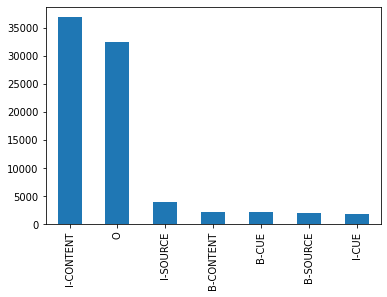

In [112]:
bins_polnear = df_polnear["AR_label"].value_counts()
total_polnear = df_polnear["AR_label"].count()
bins_polnear = bins_polnear.apply(lambda x: float(x)/total_polnear)

# Histogram of the classes
df_polnear["AR_label"].value_counts().plot(kind="bar")

<AxesSubplot:>

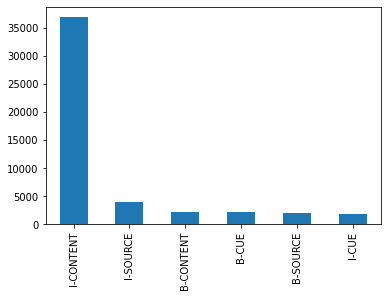

In [113]:
#check the distribution without "O":
df_polnear["AR_label"].value_counts().drop("O", axis=0).plot(kind='bar')

In [114]:
print(len(df_polnear.index))

81656


In [115]:
#write the df to a tsv file. Adjust the file path depending of BIO preference.

polnear_outfile_path = f'Preprocessed_data/polnear_with_BIO_{what_type_files}.csv'

df_polnear.to_csv(polnear_outfile_path, sep = '\t', index=False)

## 2. Prepare PARC3 data:

Implement the same processes performed on PolNeAr corpus.

In [116]:
parc3_path = f'../parc30-conll/{what_type_files}-conll-foreval/'

In [117]:
#Read files in the training data folder
parc3_folder = os.listdir(parc3_path)
print(len(parc3_folder))

# create an empty list to dump the data
parc3_data = []
#iterate over the data files
for file in parc3_folder:
    # data is not located in the same folder, thus define the file path.
    filepath = f'{parc3_path}{file}'
    # open the files
    with open(filepath, "r", encoding="latin1") as data_handle:
        # read the lines
        text_parc = data_handle.readlines()
        for line in text_parc:
            if line == text_parc[-1]:
                parc3_data.append("Art_end")
            else:
                parc3_data.append(line)
    
print("Reading the dataset.....")

print(text_parc[0])
print(type(text_parc))
print(len(text_parc))

print(parc3_data[0])
print(type(parc3_data))
print(len(parc3_data))

55
Reading the dataset.....
wsj_2447.xml	1	1	1	9,16	Trinity	Trinity	NNP	compound	3	_ _ _ B-SOURCE-AT-1 _

<class 'list'>
84
wsj_2428.xml	1	1	1	9,12	The	the	DT	det	2	_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

<class 'list'>
34143


In [118]:
text_parc_split = []
for item in parc3_data:
    item = item.strip('\n')
    text_parc_split.append(item.split("\t"))
    
print(text_parc_split[5])

['wsj_2428.xml', '1', '6', '6', '29,36', 'billion', 'billion', 'CD', 'nummod', '4', '_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _']


In [119]:
#create the data frame
df_parc3 = pd.DataFrame(text_parc_split, columns=["Article_Name", "Sentence_nr", "Nr_in_file", "Nr_in_sentence", "FromTO", "Word", "Lemma", "POS", "Dep_label", "Token_dep_head", "AR_label"])
# df_parc3 = pd.DataFrame(text_parc_split, columns=["Article_Name", "Number1", "Number2", "Number3", "Number4", "Word", "Lemma", "POS", "Dep_rel", "Number5", "AR_label"])
#drop the lines which won't be used.
# df_parc3.drop(["Article_Name","Number1", "Number2", "Number3", "Number4", "Lemma", "POS", "Dep_rel", "Number5",], axis=1, inplace=True)
#delete the lists in order to prevent confusions in the notebook.
del text_parc_split, parc3_data

In [120]:
print(len(df_parc3.index))

34143


In [121]:
df_parc3.head(50)

,Article_Name,Sentence_nr,Nr_in_file,Nr_in_sentence,FromTO,Word,Lemma,POS,Dep_label,Token_dep_head,AR_label
0,wsj_2428.xml,1,1,1,"9,12",The,the,DT,det,2,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...
1,wsj_2428.xml,1,2,2,"13,19",market,market,NN,nsubj,26,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...
2,wsj_2428.xml,1,3,3,"20,23",for,for,IN,case,4,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...
3,wsj_2428.xml,1,4,4,"24,25",$,$,$,nmod,2,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...
4,wsj_2428.xml,1,5,5,"25,28",200,200,CD,compound,6,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...
5,wsj_2428.xml,1,6,6,"29,36",billion,billion,CD,nummod,4,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...
6,wsj_2428.xml,1,7,7,"37,39",of,of,IN,case,10,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...
7,wsj_2428.xml,1,8,8,"40,49",high-risk,high-risk,JJ,amod,10,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...
8,wsj_2428.xml,1,9,9,"50,54",junk,junk,NN,compound,10,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...
9,wsj_2428.xml,1,10,10,"55,60",bonds,bond,NNS,nmod,4,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...


In [122]:
def clean_Parc3_labels(label):
    '''take the label and remove the unwanted characters, return the cleaned version'''
    
    chars_2_remove = ['_','\n','0','1','2','3','4','5','6','7','8','9','']
    clean_char = []
    for char in str(label):
        if char not in chars_2_remove:
            clean_char.append(char)
            
    clean_label = "".join(clean_char)
    final_label = clean_label.strip()

    return final_label
    

In [123]:
#test the function:
testtt = clean_Parc3_labels("_ I-CONTENT-PD-1 _ _ I-CONTENT-NE-7 _ _ _ _ ")

print(testtt)

I-CONTENT-PD-   I-CONTENT-NE-


In [124]:
#apply the function on df:
df_parc3['AR_label']=df_parc3['AR_label'].apply(clean_Parc3_labels)

In [125]:
#che the output:
df_parc3.head(50)

,Article_Name,Sentence_nr,Nr_in_file,Nr_in_sentence,FromTO,Word,Lemma,POS,Dep_label,Token_dep_head,AR_label
0,wsj_2428.xml,1,1,1,"9,12",The,the,DT,det,2,
1,wsj_2428.xml,1,2,2,"13,19",market,market,NN,nsubj,26,
2,wsj_2428.xml,1,3,3,"20,23",for,for,IN,case,4,
3,wsj_2428.xml,1,4,4,"24,25",$,$,$,nmod,2,
4,wsj_2428.xml,1,5,5,"25,28",200,200,CD,compound,6,
5,wsj_2428.xml,1,6,6,"29,36",billion,billion,CD,nummod,4,
6,wsj_2428.xml,1,7,7,"37,39",of,of,IN,case,10,
7,wsj_2428.xml,1,8,8,"40,49",high-risk,high-risk,JJ,amod,10,
8,wsj_2428.xml,1,9,9,"50,54",junk,junk,NN,compound,10,
9,wsj_2428.xml,1,10,10,"55,60",bonds,bond,NNS,nmod,4,


PARC3 corpus contains nested attributions. We decided not use them so they are removed with following function:

In [126]:
def remove_nested(label):
    
    '''Get the first part of the label. Remove nested AR labels, number, other codes ect.'''
    
    v = str(label)
    
    v= v.split('-')
    
    if len(v) > 3 and v[2] != "NE":

        k = v[:2]

        m = '-'.join(k)
    
        n = m.strip() 
        
    else:
  
        n = "O"
        
    return n

In [127]:
#test the function:

test_list = "I-CONTENT-AT- B-CONTENT-NE"

t = remove_nested(test_list)

print(t)

I-CONTENT


In [128]:
#apply it on the df:

df_parc3['AR_label']=df_parc3['AR_label'].apply(remove_nested)

In [129]:
df_parc3['Word'] = df_parc3['Word'].apply(mark_sent_end)

In [130]:
df_parc3.head(50)

,Article_Name,Sentence_nr,Nr_in_file,Nr_in_sentence,FromTO,Word,Lemma,POS,Dep_label,Token_dep_head,AR_label
0,wsj_2428.xml,1,1,1,"9,12",The,the,DT,det,2,O
1,wsj_2428.xml,1,2,2,"13,19",market,market,NN,nsubj,26,O
2,wsj_2428.xml,1,3,3,"20,23",for,for,IN,case,4,O
3,wsj_2428.xml,1,4,4,"24,25",$,$,$,nmod,2,O
4,wsj_2428.xml,1,5,5,"25,28",200,200,CD,compound,6,O
5,wsj_2428.xml,1,6,6,"29,36",billion,billion,CD,nummod,4,O
6,wsj_2428.xml,1,7,7,"37,39",of,of,IN,case,10,O
7,wsj_2428.xml,1,8,8,"40,49",high-risk,high-risk,JJ,amod,10,O
8,wsj_2428.xml,1,9,9,"50,54",junk,junk,NN,compound,10,O
9,wsj_2428.xml,1,10,10,"55,60",bonds,bond,NNS,nmod,4,O


In [131]:
#check the labels.

AR_labels_PARC = set(df_parc3['AR_label'].values.tolist())

print(len(AR_labels_PARC))


7


In [132]:
#look at their forms:
print(AR_labels_PARC)

{'I-CONTENT', 'B-CUE', 'I-CUE', 'O', 'B-CONTENT', 'I-SOURCE', 'B-SOURCE'}


<AxesSubplot:>

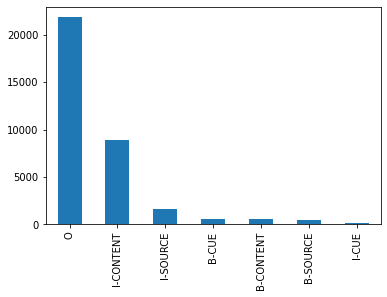

In [133]:
# Histogram of the classes

bins_parc3 = df_parc3["AR_label"].value_counts()
total_parc3 = df_parc3["AR_label"].count()
bins_parc3 = bins_parc3.apply(lambda x: float(x)/total_parc3)

df_parc3["AR_label"].value_counts().plot(kind="bar")

In [134]:
#write the df to a tsv file. Adjust the file path depending of BIO preference.

parc_outfile_path = f'Preprocessed_data/parc3_with_BIO_{what_type_files}.csv'

df_parc3.to_csv(parc_outfile_path, sep = '\t', index = False)

### Merge PolNeAr and Parc3 data frames: 

In [135]:
# append the df_parc3 to df_polnear

df_merged = df_polnear.append(df_parc3, ignore_index=True)
df_merged["AR_label"] = df_merged["AR_label"].replace(np.nan, 0)

In [136]:
#check their lenght:
print(len(df_polnear.index))
print(len(df_parc3.index))
print(len(df_merged.index))

81656
34143
115799


In [137]:
df_merged.head(1000)

,Article_Name,Sentence_nr,Nr_in_file,Nr_in_sentence,FromTo,Word,Lemma,POS,Dep_label,Token_dep_head,AR_label,FromTO
0,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,1,1,"0,3",Pat,Pat,NNP,compound,2,B-SOURCE,NaN
1,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,2,2,"4,11",Caddell,Caddell,NNP,root,0,I-SOURCE,NaN
2,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,3,3,"11,12",:,:,:,punct,2,B-CUE,NaN
3,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,4,4,"13,21",Democrat,Democrat,NNP,compound,5,B-CONTENT,NaN
4,breitbart_2016-09-15_pat-caddell-democrat-vote...,1,5,5,"22,28",Voters,Voters,NNPS,dep,2,I-CONTENT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,nyt_2016-09-30_keep-the-returns-trump-just-giv...,2,14,1,"54,57",Mr.,Mr.,NNP,compound,2,O,NaN
996,nyt_2016-09-30_keep-the-returns-trump-just-giv...,2,15,2,"58,63",Trump,Trump,NNP,root,0,O,NaN
997,nyt_2016-09-30_keep-the-returns-trump-just-giv...,2,16,3,"63,64",",",",",",",punct,2,O,NaN
998,nyt_2016-09-30_keep-the-returns-trump-just-giv...,2,17,4,"65,66",I,I,PRP,nsubj,5,O,NaN


In [138]:
#check the labels.

AR_labels_merged = set(df_merged['AR_label'].values.tolist())

print(len(AR_labels_merged))
print(AR_labels_merged)

7
{'I-CONTENT', 'B-CUE', 'I-CUE', 'O', 'I-SOURCE', 'B-CONTENT', 'B-SOURCE'}


<AxesSubplot:>

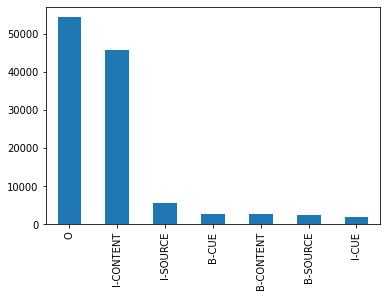

In [139]:
# Histogram of the classes

bins_merged = df_merged["AR_label"].value_counts()
total_merged = df_merged["AR_label"].count()
bins_merged = bins_merged.apply(lambda x: float(x)/total_merged)

df_merged["AR_label"].value_counts().plot(kind="bar")

In [140]:
print(len(df_merged.index))

115799


In [141]:
#write the df to a tsv file. Adjust the file path depending of BIO preference.

merged_outfile_path = f'Preprocessed_data/merged_with_BIO_{what_type_files}.csv'

df_merged.to_csv(merged_outfile_path, sep = '\t', index=False)

The model will be trained on another notebook.

Please see AR_with_CRF_Word Embeddings-Final notebook.

End of this notebook.